# Part II - Communicate Data Findings
## by Otiengo Philip

## Investigation Overview


The main feature of interest from the dataset is the Prosper Score which is custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Visualizations on how the other variables affects it and inferences to be made.


## Dataset Overview

The dataset is comprised of 81 variables and contains 113937 entries from **_prosper.com_** about the borrowers such as monthly income, is home owner or not etc and the loans borrowed such as rosper score,loan amount,repayment period etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## (Visualization 1)

Approximately 90% of the loans according to this study are good loans, either being paid or completed while 10% are bad loans, defaulted or charged off.


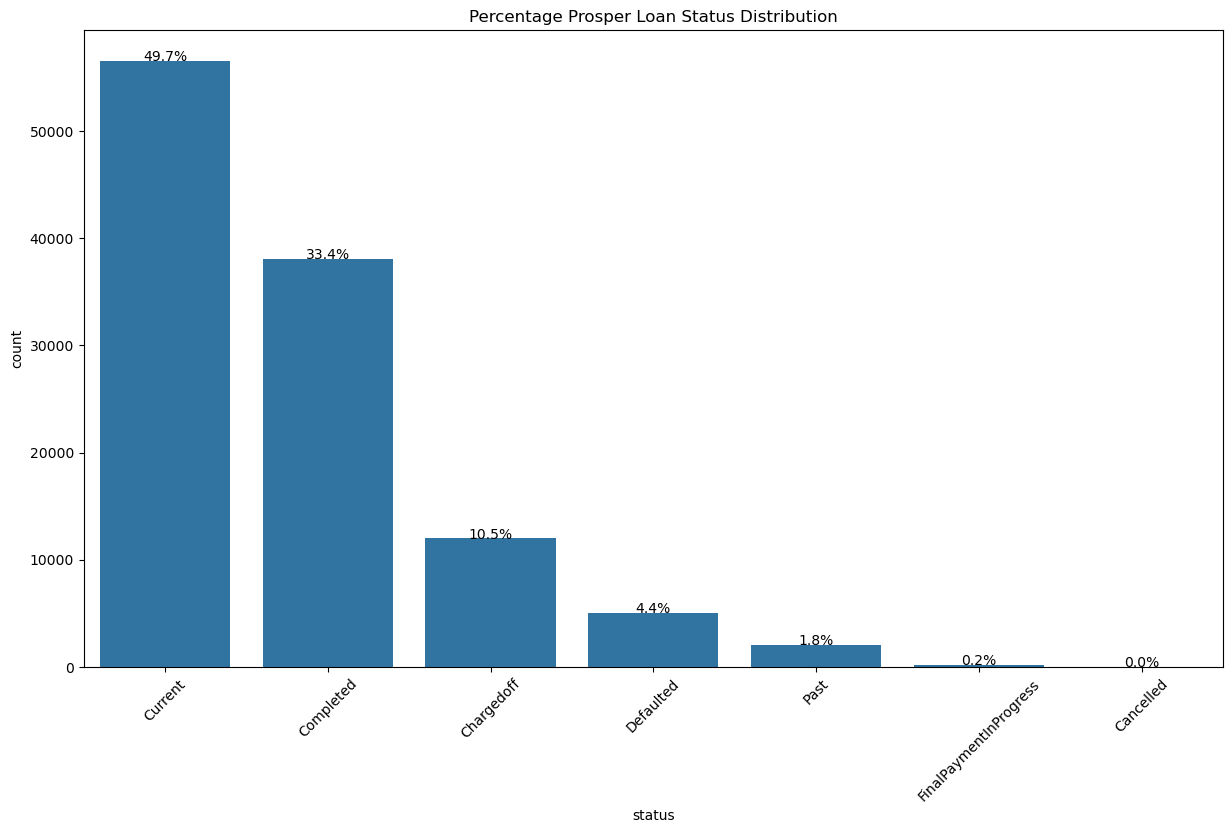

In [3]:
df['status'] = df['LoanStatus'].apply(lambda x:x.split()[0])
# Print the proportion below the bars and order the Status counts ascending
loan=df['status'].value_counts().sum()
status_count=df['status'].value_counts()
status_order=status_count.index
plt.figure(figsize=[14.70, 8.27])

#set base colour and plot
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='status', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    

    
plt.title('Percentage Prosper Loan Status Distribution');

## (Visualization 2)

Prosper rating and estimated rating has a correlation r=-0.96, higher ratings means lower loss realised by the loans. This is a inverse in the correlation between the estimated loss and both Borrower Rate and Borrower APR as increase in the rates causing an increase in loss realised on the loans.

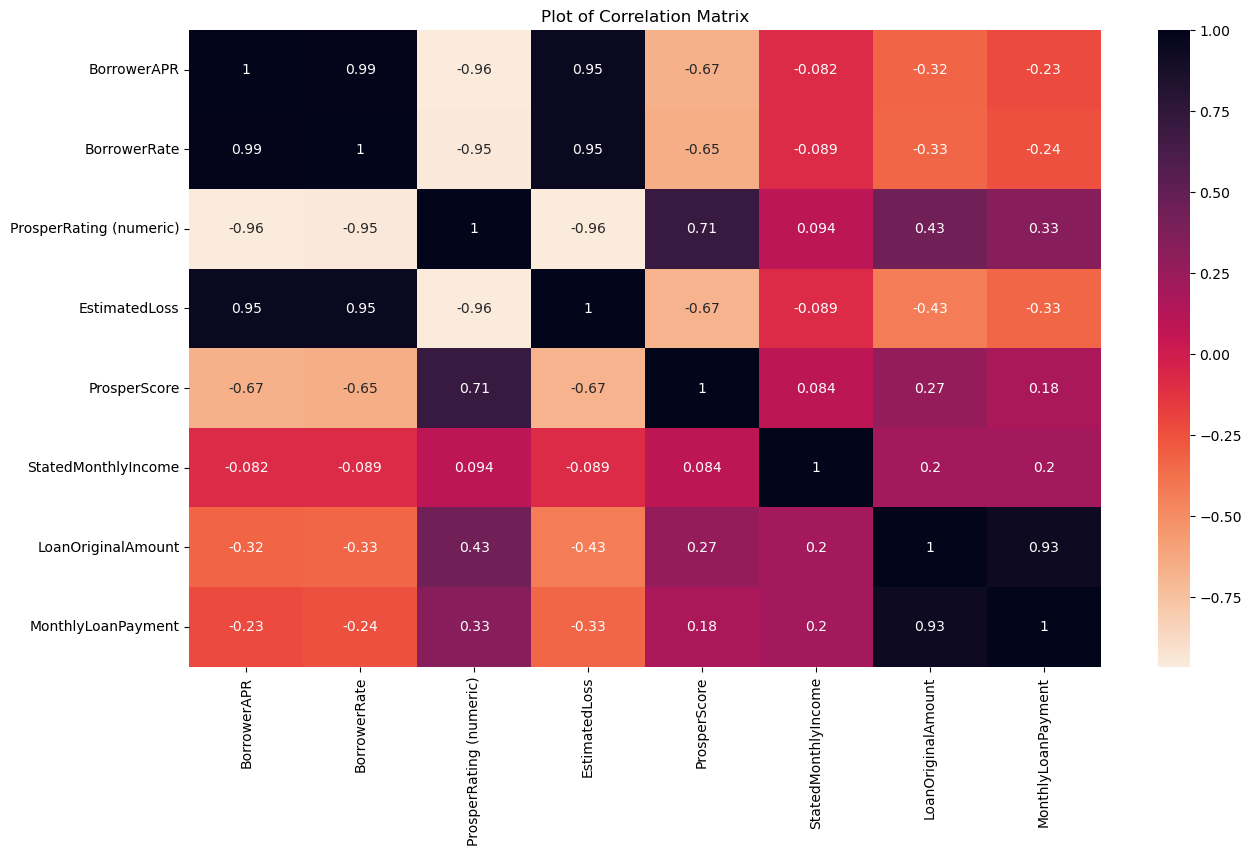

In [4]:
df_interests = ['BorrowerAPR','BorrowerRate','ProsperRating (numeric)','EstimatedLoss','ProsperScore',
                'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']
plt.figure(figsize=[14.70, 8.27])

sns.heatmap(df[df_interests].corr(), cmap='rocket_r', annot=True);
plt.title('Plot of Correlation Matrix');

## (Visualization 3)

Loan amounts for employed and self employed are quite higher with Home owners taking much more than those with no homes. Retirees tends to take little home but generally owning a home guarantees much larger loans.

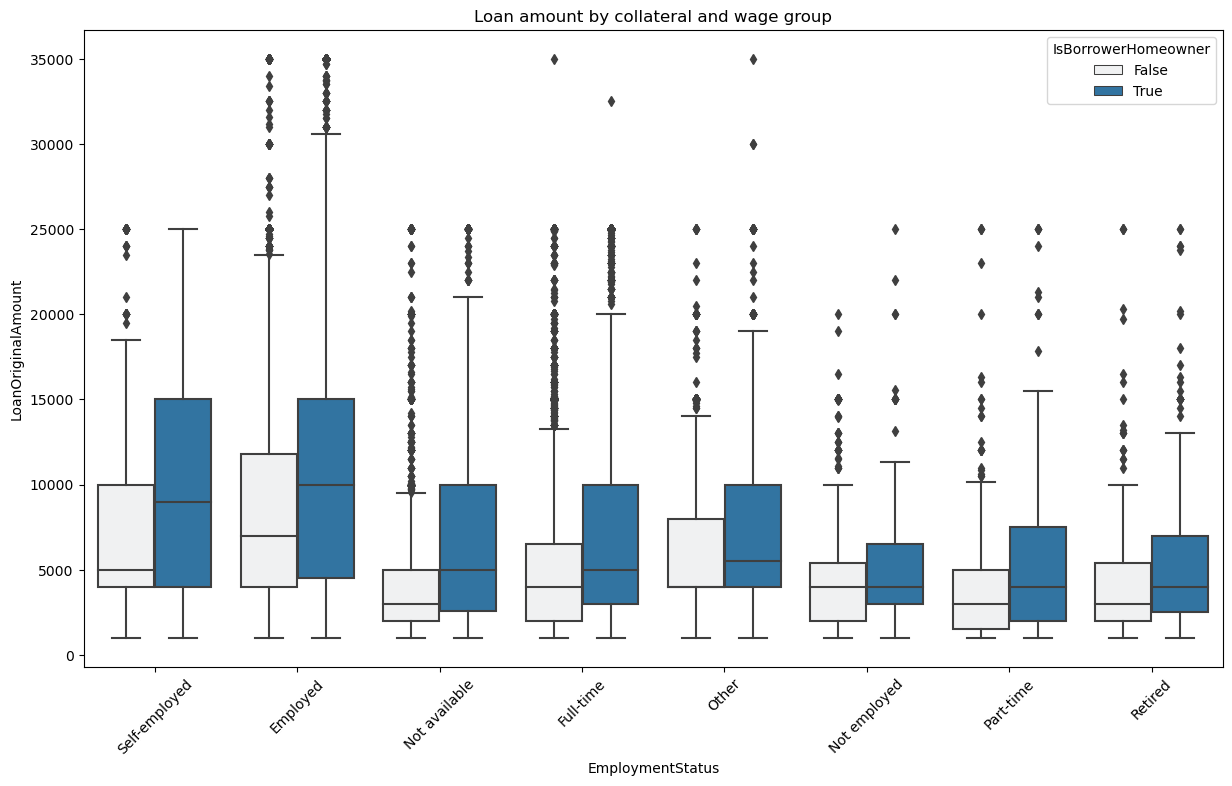

In [5]:
#plot boxplot
plt.figure(figsize=[14.70, 8.27])
locs, labels = plt.xticks(rotation=45) 
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount',
           hue = 'IsBorrowerHomeowner' ,color = base_color);
plt.title('Loan amount by collateral and wage group');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 875614 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server


In [ ]:
!jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl --post serve